In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:

df = pd.read_csv('data.csv')

# Exploratory Data Analysis

In [152]:

df.head()


,search_term,product_variant_id,city_id,query_type,is_clicked,total_clicks,session_views,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,...,latest_margin,savings,savings_with_pass,ad_revenue,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity
0,akshayakalpa milk,c442ad9b-09b6-4505-a17d-7d2b3cceee0e,ee66dc2a-aded-4445-a7b2-1ad63715725c,head,0.0,0,0,0,0.000000,0.0,...,6.900000,0.040000,2.718400,0.000000,155,376,552508,167494,0.054913,0.384844
1,ice cubes,33e1c372-8f6b-4312-b4df-93911f4c1caf,7e926d2f-adad-4e5a-956f-f07fffa54164,head,0.0,0,57,0,0.000000,0.0,...,42.010000,0.250000,5.009091,0.000000,14,41,3264,1313,0.003239,0.324977
2,protien,8ed8801e-f3bd-46ed-a212-24dcaa33d937,078d5e32-627a-4907-8df8-4360bc7c06da,head,1.0,29,545,9,0.040179,0.0,...,10.243929,0.160000,3.239500,18.622949,1469,3335,55215,24085,0.061085,0.220603
3,comb,b16224dd-5b0b-4e39-91d0-b52e563c70c2,4f30407c-6a3c-4a4e-8a3d-652217d4b6cb,head,0.0,0,13,0,0.000000,0.0,...,21.433421,0.000000,5.118421,0.000000,14567,28849,216304,121334,0.120340,0.061622
4,nail polish remover,25efac15-9a86-4da1-ab36-94e32bc7ecd9,4f30407c-6a3c-4a4e-8a3d-652217d4b6cb,tail,0.0,0,1,0,0.000000,0.0,...,13.487105,0.036957,4.915103,20.365139,1043,2446,14527,6418,0.052714,0.390254


In [5]:
summary_stats = df.describe()
missing_values = df.isnull().sum()

print(summary_stats)
print(missing_values)

          is_clicked   total_clicks  session_views  \
count  504989.000000  504989.000000   5.049890e+05   
mean        0.302797      61.904162   1.328208e+03   
std         0.459468    1823.134651   9.122391e+03   
min         0.000000       0.000000   0.000000e+00   
25%         0.000000       0.000000   5.000000e+00   
50%         0.000000       0.000000   4.000000e+01   
75%         1.000000       1.000000   3.990000e+02   
max         1.000000  736321.000000   1.433123e+06   

       query_products_clicks_last_30_days  CTR_last_30_days  CTR_last_7_days  \
count                       504989.000000     504989.000000    504989.000000   
mean                            21.881360          0.008795         0.007690   
std                            674.481299          0.044308         0.048211   
min                              0.000000          0.000000         0.000000   
25%                              0.000000          0.000000         0.000000   
50%                              

In [156]:
# Handling missing values

# Filingl missing values in categorical columns with 'Unknown'
categorical_columns = ['product_name', 'brand_name', 'category_name', 'subcategory_name']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Filling missing values in numerical columns with mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

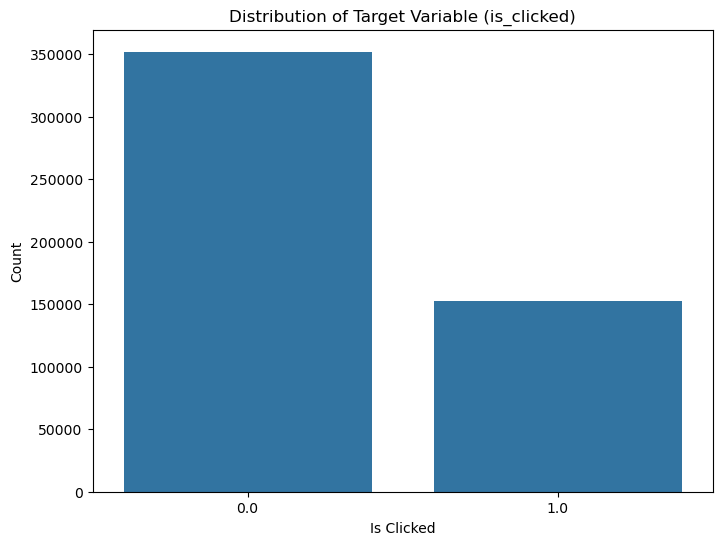

In [158]:
# distribution of the target variable 'is_clicked'
plt.figure(figsize=(8, 6))
sns.countplot(x='is_clicked', data=df)
plt.title('Distribution of Target Variable (is_clicked)')
plt.xlabel('Is Clicked')
plt.ylabel('Count')
plt.show()


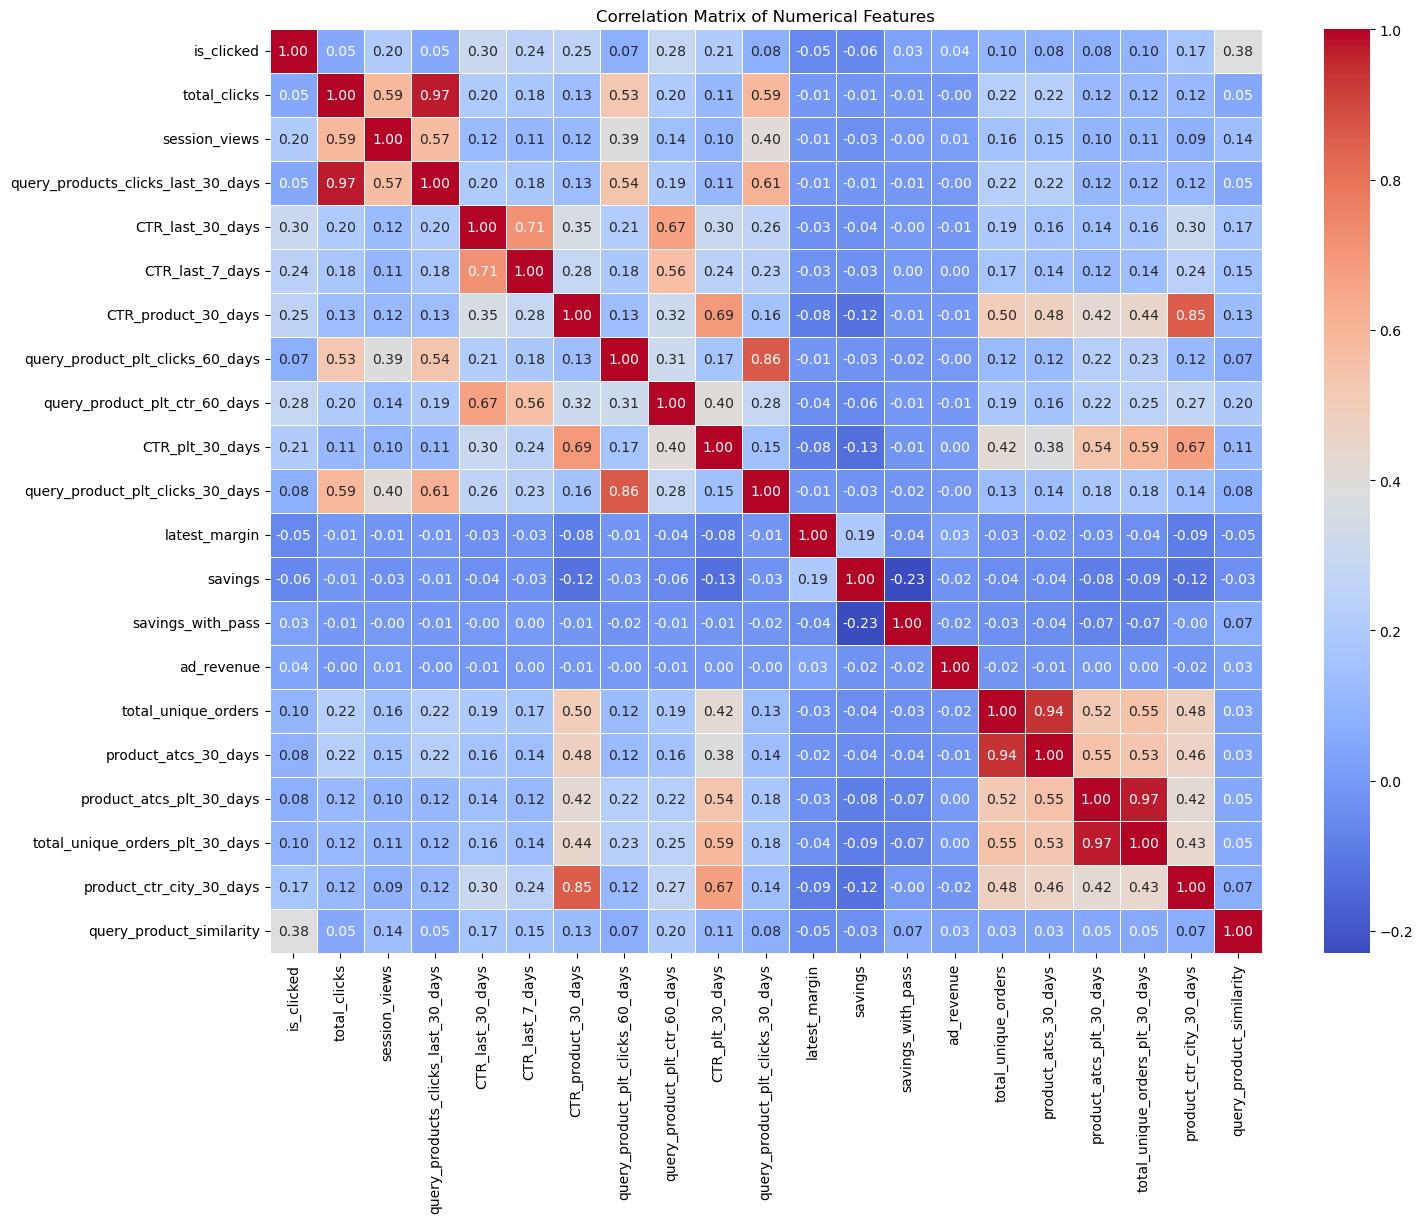

In [8]:
# Correlation analysis
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

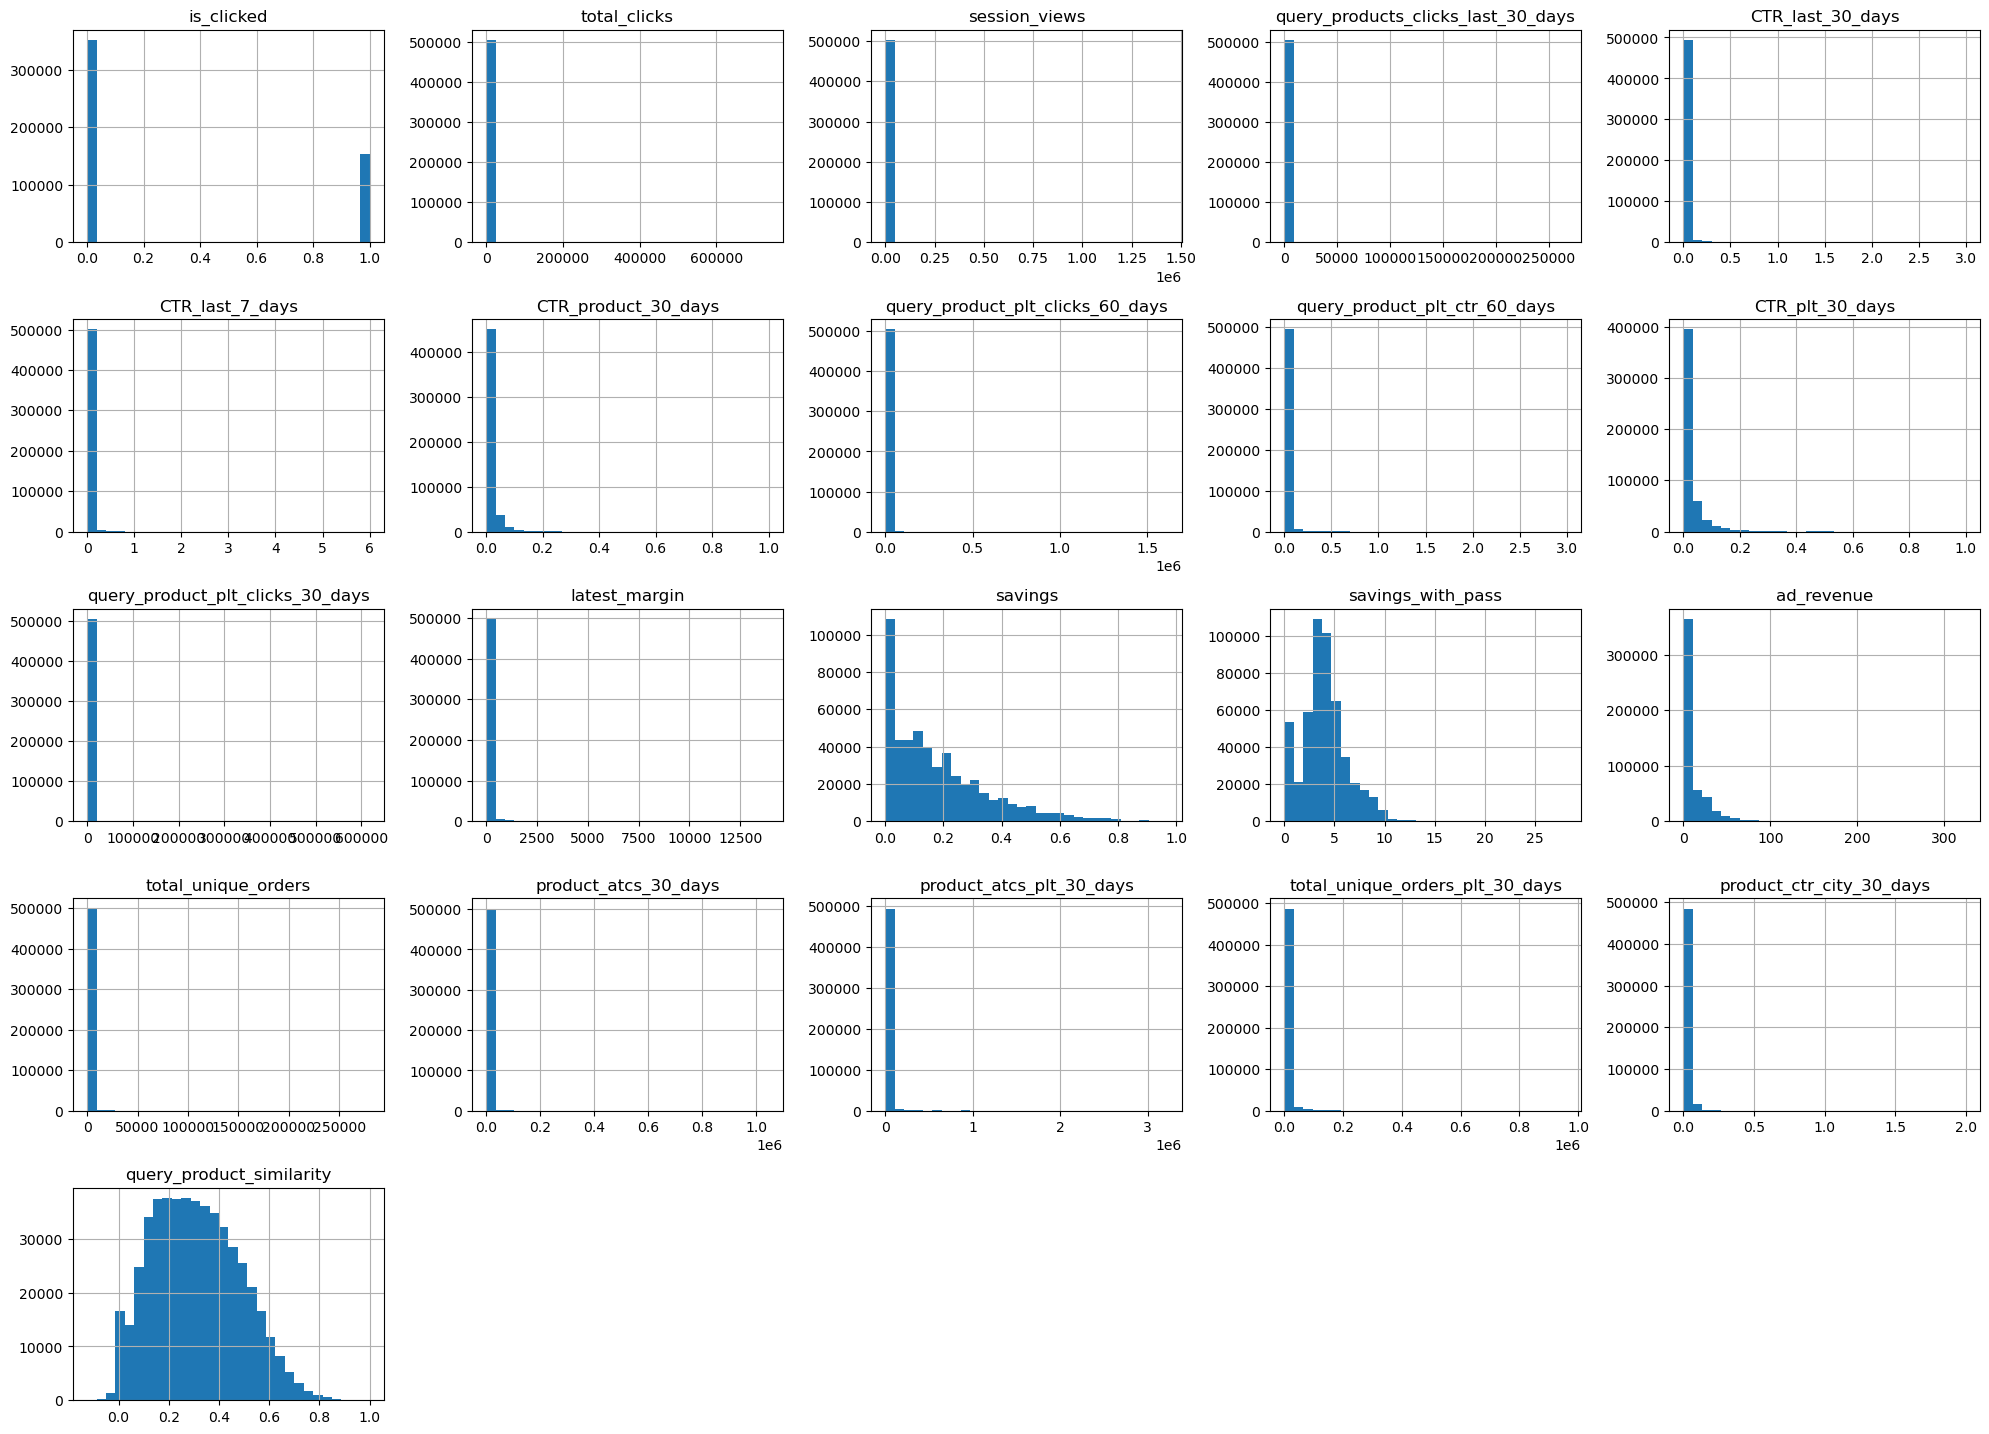

In [10]:
# histograms for numerical features
df[numerical_columns].hist(bins=30, figsize=(20, 20), layout=(7, 5))
plt.tight_layout()
plt.show()

In [12]:
unique_values = df.select_dtypes(include=['object']).nunique()
print(unique_values)

search_term                    1997
product_variant_id            30353
city_id                          12
query_type                        2
predicted_category_name         481
predicted_subcategory_name     1605
product_name                  26277
brand_name                     1844
category_name                    39
subcategory_name                288
dtype: int64


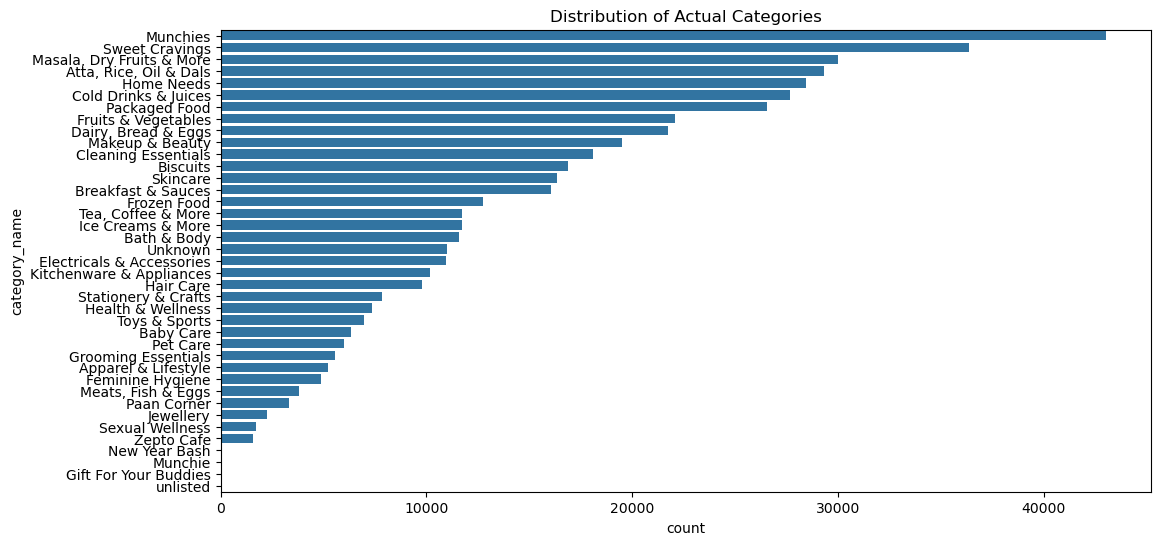

In [13]:
#  distribution of actual categories
plt.figure(figsize=(12, 6))
sns.countplot(y=df['category_name'], order=df['category_name'].value_counts().index)
plt.title('Distribution of Actual Categories')
plt.show()

In [14]:
#  top predicted category
df['predicted_category_name'] = df['predicted_category_name'].apply(lambda x: max(eval(x), key=eval(x).get))
df['predicted_subcategory_name'] = df['predicted_subcategory_name'].apply(lambda x: max(eval(x), key=eval(x).get))

# actual and predicted categories
category_comparison = pd.crosstab(df['category_name'], df['predicted_category_name'])
subcategory_comparison = pd.crosstab(df['subcategory_name'], df['predicted_subcategory_name'])

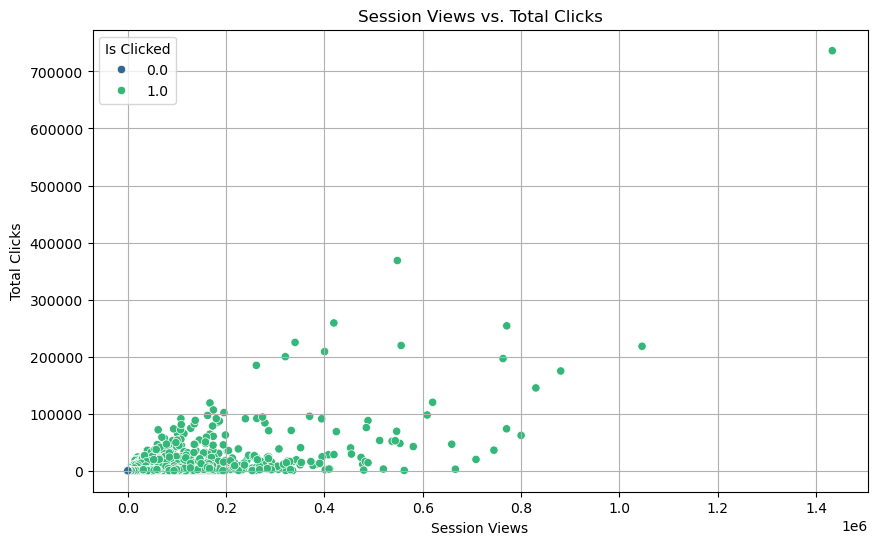

In [16]:
# Scatter plot of session views vs. total clicks
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='session_views', y='total_clicks', hue='is_clicked', palette='viridis')
plt.title('Session Views vs. Total Clicks')
plt.xlabel('Session Views')
plt.ylabel('Total Clicks')
plt.legend(title='Is Clicked')
plt.grid(True)
plt.show()


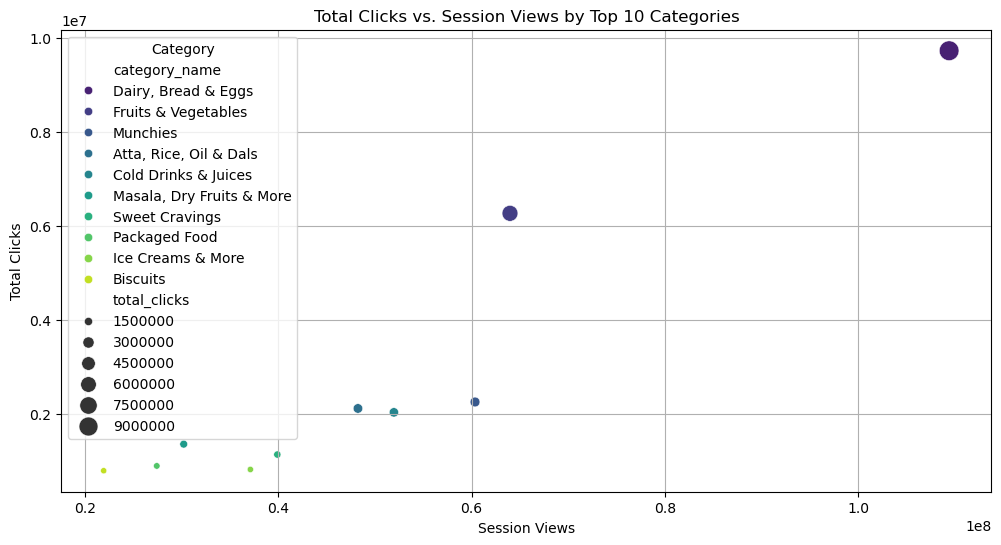

In [17]:

# group data by category
category_data = df.groupby('category_name').agg({
    'total_clicks': 'sum',
    'session_views': 'sum'
}).reset_index()

# sorting by total_clicks and selecting the top 10 categories
top_categories = category_data.sort_values(by='total_clicks', ascending=False).head(10)

# Scatter plot of total clicks vs. session views by category
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_categories, x='session_views', y='total_clicks', hue='category_name', palette='viridis', size='total_clicks', sizes=(20, 200))
plt.title('Total Clicks vs. Session Views by Top 10 Categories')
plt.xlabel('Session Views')
plt.ylabel('Total Clicks')
plt.legend(title='Category')
plt.grid(True)
plt.show()



C:\Users\Dhanyaa\AppData\Local\Temp\ipykernel_1464\1224952758.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='city_id', y='total_clicks', data=top_cities, palette='viridis', ax=ax1, label='Total Clicks', alpha=0.7)
C:\Users\Dhanyaa\AppData\Local\Temp\ipykernel_1464\1224952758.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_cities['city_id'], rotation=30)  # Show city IDs on x-axis


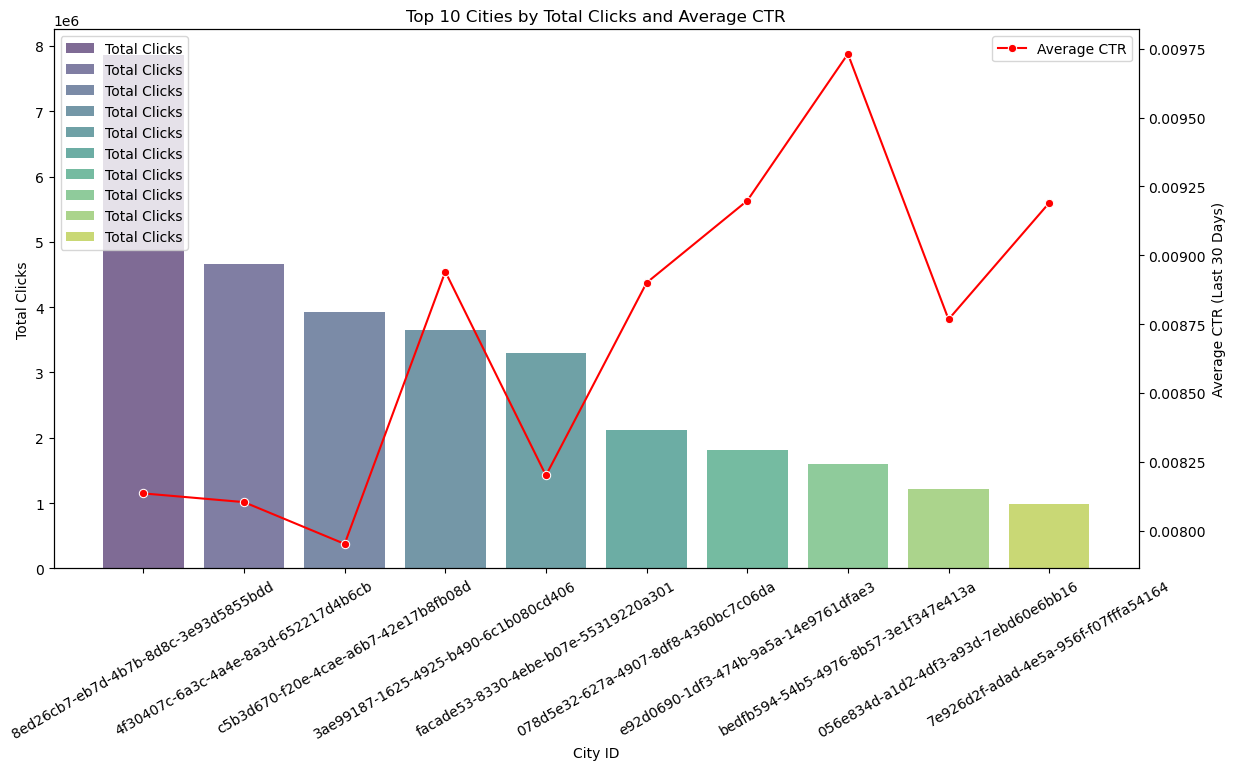

In [18]:


# group data by city
city_data = df.groupby('city_id').agg({
    'total_clicks': 'sum',
    'CTR_last_30_days': 'mean'
}).reset_index()

# Sort by total_clicks and select the top 10 cities
top_cities = city_data.sort_values(by='total_clicks', ascending=False).head(10)


fig, ax1 = plt.subplots(figsize=(14, 7))


bar_plot = sns.barplot(x='city_id', y='total_clicks', data=top_cities, palette='viridis', ax=ax1, label='Total Clicks', alpha=0.7)


ax2 = ax1.twinx()
line_plot = sns.lineplot(x='city_id', y='CTR_last_30_days', data=top_cities, color='red', marker='o', ax=ax2, label='Average CTR')


ax1.set_title('Top 10 Cities by Total Clicks and Average CTR')
ax1.set_xlabel('City ID')
ax1.set_ylabel('Total Clicks')
ax2.set_ylabel('Average CTR (Last 30 Days)')


ax1.set_xticklabels(top_cities['city_id'], rotation=30)  # Show city IDs on x-axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')





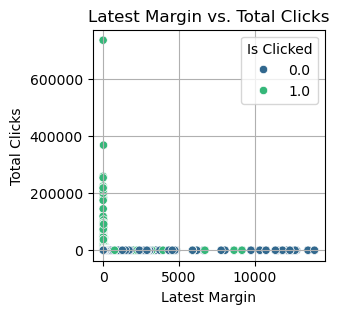

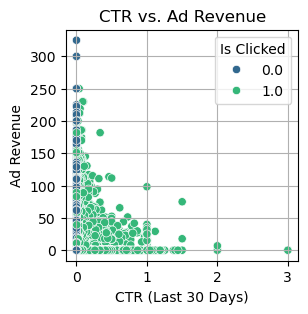

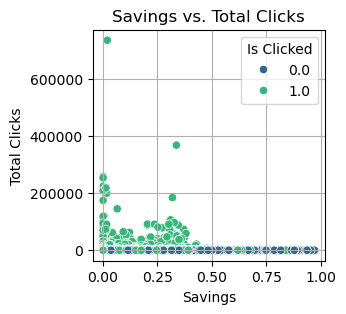

In [150]:
# Scatter plot of latest margin vs. total clicks
plt.figure(figsize=(3, 3))
sns.scatterplot(data=df, x='latest_margin', y='total_clicks', hue='is_clicked', palette='viridis')
plt.title('Latest Margin vs. Total Clicks')
plt.xlabel('Latest Margin')
plt.ylabel('Total Clicks')
plt.legend(title='Is Clicked')
plt.grid(True)
plt.show()

# Scatter plot of CTR vs. Ad Revenue
plt.figure(figsize=(3, 3))
sns.scatterplot(data=df, x='CTR_last_30_days', y='ad_revenue', hue='is_clicked', palette='viridis')
plt.title('CTR vs. Ad Revenue')
plt.xlabel('CTR (Last 30 Days)')
plt.ylabel('Ad Revenue')
plt.legend(title='Is Clicked')
plt.grid(True)

# Scatter plot of savings vs. total clicks
plt.figure(figsize=(3, 3))
sns.scatterplot(data=df, x='savings', y='total_clicks', hue='is_clicked', palette='viridis')
plt.title('Savings vs. Total Clicks')
plt.xlabel('Savings')
plt.ylabel('Total Clicks')
plt.legend(title='Is Clicked')
plt.grid(True)
plt.show()


C:\Users\Dhanyaa\AppData\Local\Temp\ipykernel_1464\1811998465.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CTR_last_30_days', y='product_name', data=top_products, palette='viridis')


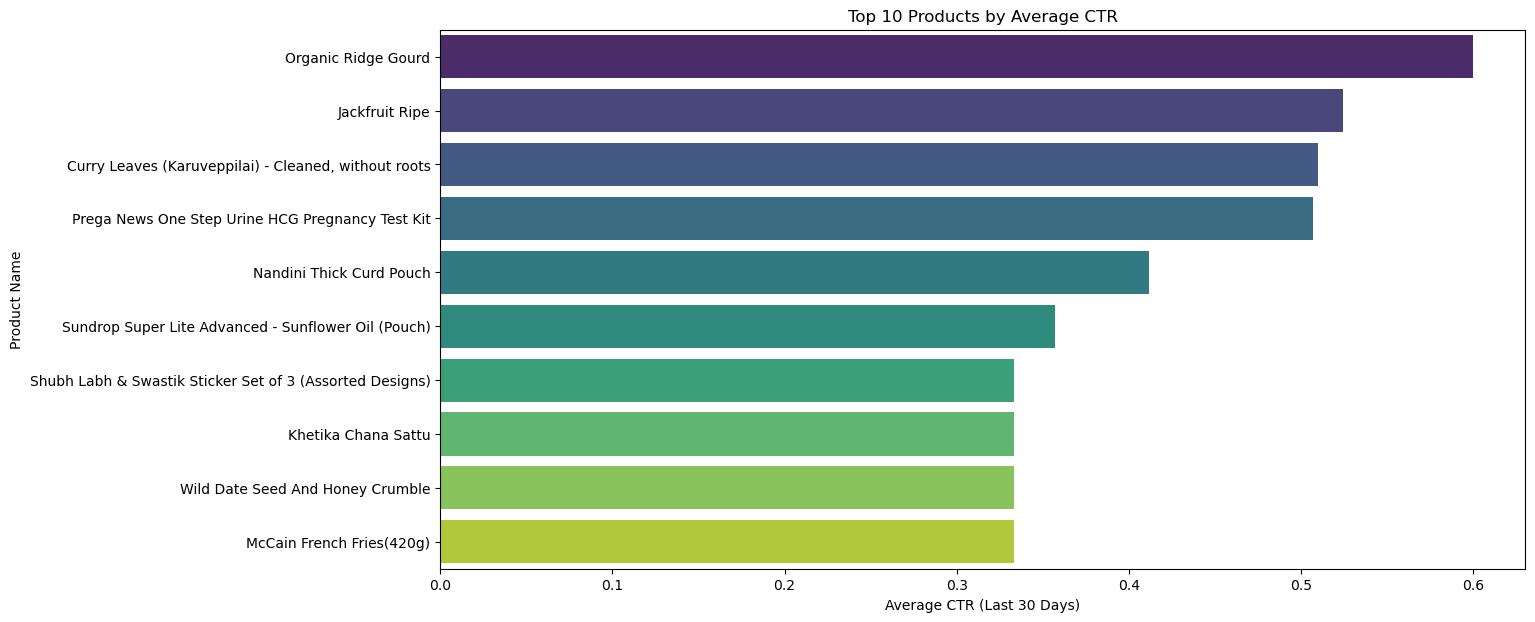

C:\Users\Dhanyaa\AppData\Local\Temp\ipykernel_1464\1811998465.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CTR_last_30_days', y='brand_name', data=top_brands, palette='viridis')


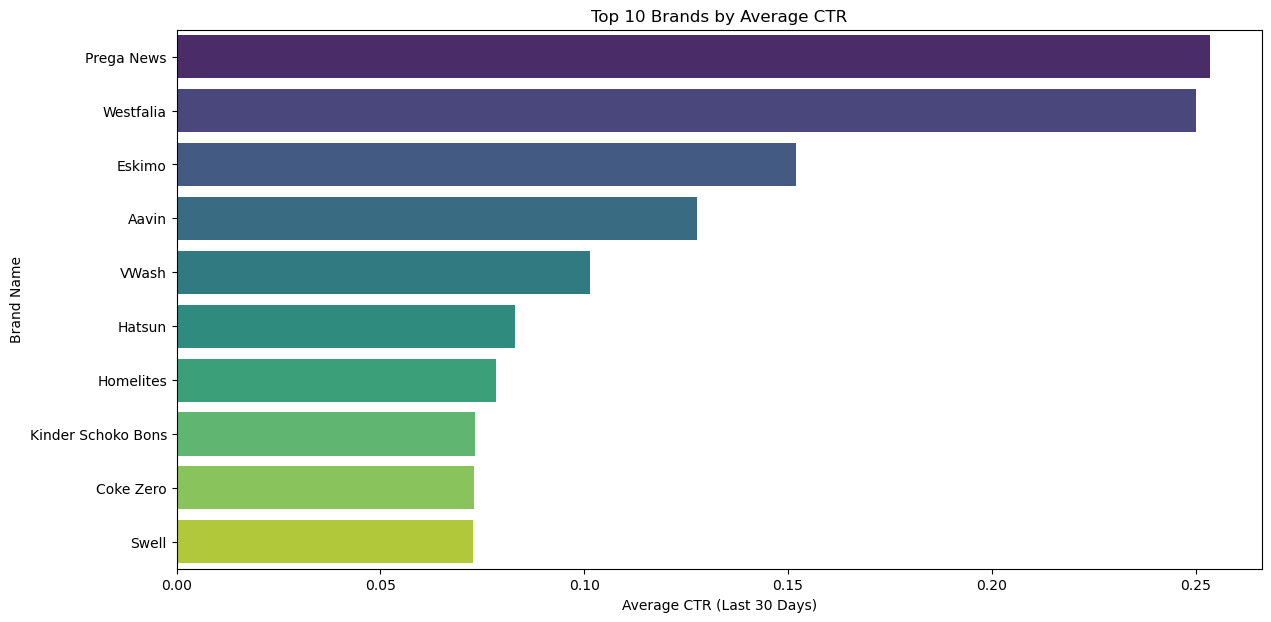

In [20]:
# group data by product and brand
product_brand_data = df.groupby(['product_name', 'brand_name']).agg({
    'CTR_last_30_days': 'mean'
}).reset_index()

# Plot CTR by product
plt.figure(figsize=(14, 7))
top_products = product_brand_data.sort_values(by='CTR_last_30_days', ascending=False).head(10)
sns.barplot(x='CTR_last_30_days', y='product_name', data=top_products, palette='viridis')
plt.title('Top 10 Products by Average CTR')
plt.xlabel('Average CTR (Last 30 Days)')
plt.ylabel('Product Name')
plt.show()

# Plot CTR by brand
plt.figure(figsize=(14, 7))
top_brands = product_brand_data.groupby('brand_name').agg({
    'CTR_last_30_days': 'mean'
}).reset_index().sort_values(by='CTR_last_30_days', ascending=False).head(10)
sns.barplot(x='CTR_last_30_days', y='brand_name', data=top_brands, palette='viridis')
plt.title('Top 10 Brands by Average CTR')
plt.xlabel('Average CTR (Last 30 Days)')
plt.ylabel('Brand Name')
plt.show()


C:\Users\Dhanyaa\AppData\Local\Temp\ipykernel_1464\526558751.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='query_type', y='latest_margin', data=query_type_margin, palette='viridis', ax=ax1, alpha=0.7, label='Profit Margin')


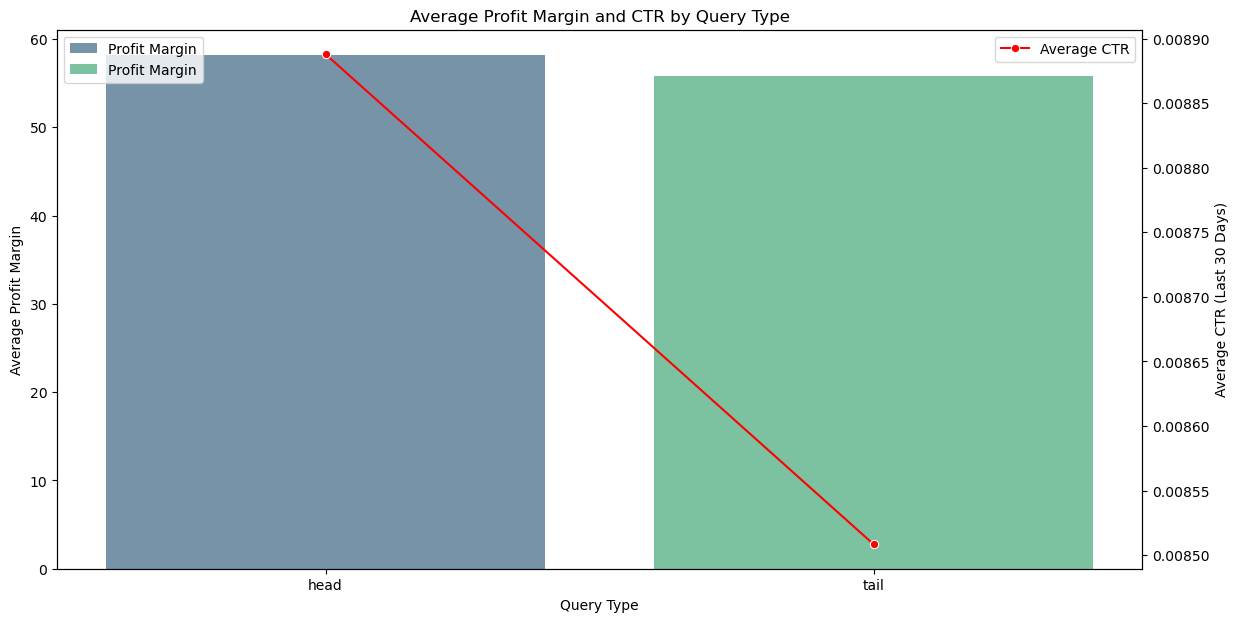

In [21]:
# Aggregate data by query type
query_type_margin = df.groupby('query_type').agg({
    'CTR_last_30_days': 'mean',
    'latest_margin': 'mean'
}).reset_index()


fig, ax1 = plt.subplots(figsize=(14, 7))


sns.barplot(x='query_type', y='latest_margin', data=query_type_margin, palette='viridis', ax=ax1, alpha=0.7, label='Profit Margin')


ax2 = ax1.twinx()
sns.lineplot(x='query_type', y='CTR_last_30_days', data=query_type_margin, color='red', marker='o', ax=ax2, label='Average CTR')

ax1.set_title('Average Profit Margin and CTR by Query Type')
ax1.set_xlabel('Query Type')
ax1.set_ylabel('Average Profit Margin')
ax2.set_ylabel('Average CTR (Last 30 Days)')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()



     search_term  session_views  CTR_last_30_days  CTR_last_30_days_scaled
917       paneer   38598.530303          0.017102              1710.165570
13         aavin   38405.000000          0.284363             28436.261348
847     mushroom   37737.043478          0.188790             18878.981541
785         milk   31940.189091          0.009199               919.863949
537        gokul   29213.000000          0.298652             29865.182653
1253      tomato   26923.577640          0.016927              1692.739951
612    ice cream   26895.751840          0.008490               848.953766
361         curd   26536.331276          0.009417               941.722735
182   buttermilk   26220.500000          0.144698             14469.815334
80        banana   24293.746725          0.011443              1144.305723


C:\Users\Dhanyaa\AppData\Local\Temp\ipykernel_1464\1776738642.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='session_views', y='search_term', data=top_search_terms, palette='viridis', ax=ax1, alpha=0.7, label='Avg Session Views')


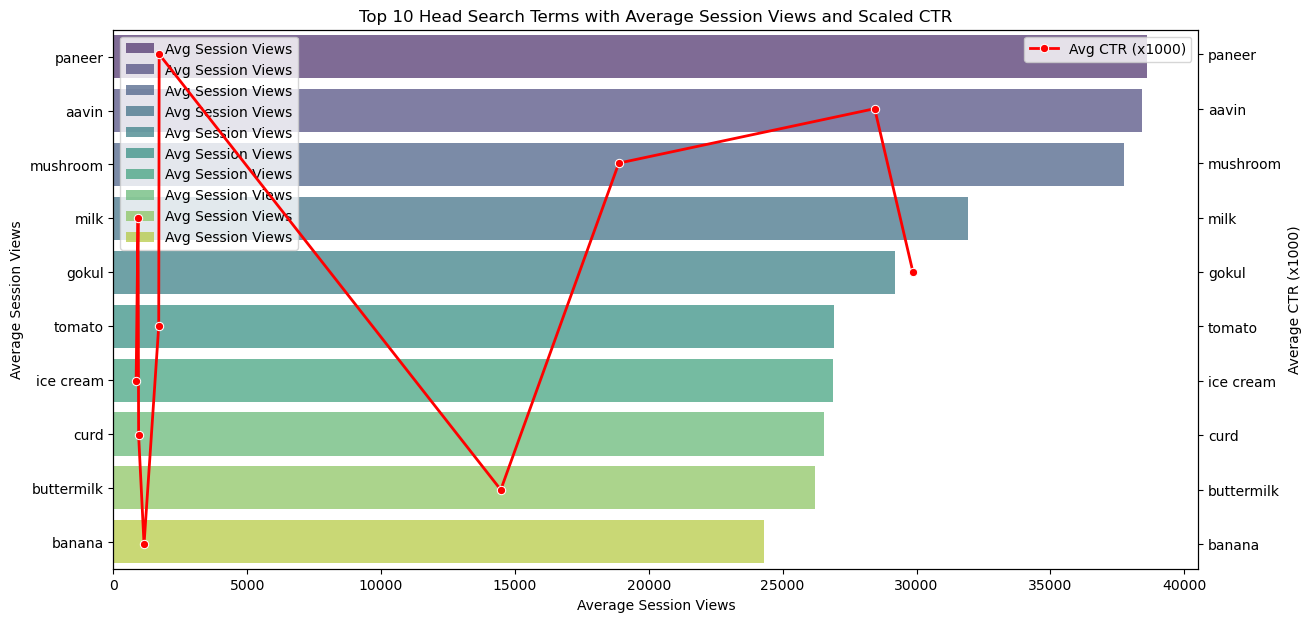

In [22]:

head_queries = df[df['query_type'] == 'head']


search_term_agg = head_queries.groupby('search_term').agg({
    'session_views': 'mean',
    'CTR_last_30_days': 'mean'
}).reset_index()

# Multiply CTR by 1000 for better visibility
search_term_agg['CTR_last_30_days_scaled'] = search_term_agg['CTR_last_30_days'] * 100000


top_search_terms = search_term_agg.nlargest(10, 'session_views')

# Display the top 10 search terms with their average session views and scaled CTR
print(top_search_terms)


fig, ax1 = plt.subplots(figsize=(14, 7))


sns.barplot(x='session_views', y='search_term', data=top_search_terms, palette='viridis', ax=ax1, alpha=0.7, label='Avg Session Views')


ax2 = ax1.twinx()
sns.lineplot(x='CTR_last_30_days_scaled', y='search_term', data=top_search_terms, color='red', marker='o', ax=ax2, label='Avg CTR (x1000)', linewidth=2)


ax1.set_title('Top 10 Head Search Terms with Average Session Views and Scaled CTR')
ax1.set_xlabel('Average Session Views')
ax1.set_ylabel('Average Session Views')
ax2.set_ylabel('Average CTR (x1000)')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.show()

C:\Users\Dhanyaa\AppData\Local\Temp\ipykernel_1464\625813034.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_margin_data = df.groupby('CTR_bins').agg({
C:\Users\Dhanyaa\AppData\Local\Temp\ipykernel_1464\625813034.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CTR_bins', y='latest_margin', data=profit_margin_data, palette='viridis', ax=ax1, alpha=0.7, label='Profit Margin')


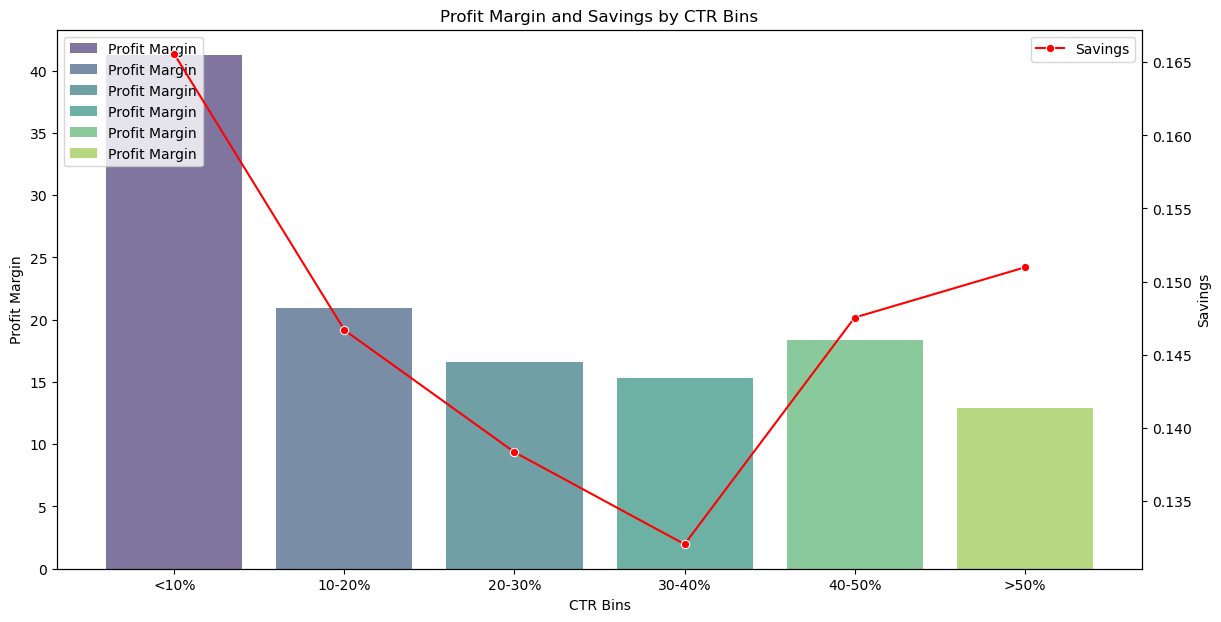

In [23]:
# Binning CTR values
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1]
labels = ['<10%', '10-20%', '20-30%', '30-40%', '40-50%', '>50%']
df['CTR_bins'] = pd.cut(df['CTR_last_30_days'], bins=bins, labels=labels)

#  data by CTR bins
profit_margin_data = df.groupby('CTR_bins').agg({
    'latest_margin': 'mean',
    'savings': 'mean'
}).reset_index()


fig, ax1 = plt.subplots(figsize=(14, 7))

sns.barplot(x='CTR_bins', y='latest_margin', data=profit_margin_data, palette='viridis', ax=ax1, alpha=0.7, label='Profit Margin')

s
ax2 = ax1.twinx()
sns.lineplot(x='CTR_bins', y='savings', data=profit_margin_data, color='red', marker='o', ax=ax2, label='Savings')

ax1.set_title('Profit Margin and Savings by CTR Bins')
ax1.set_xlabel('CTR Bins')
ax1.set_ylabel('Profit Margin')
ax2.set_ylabel('Savings')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


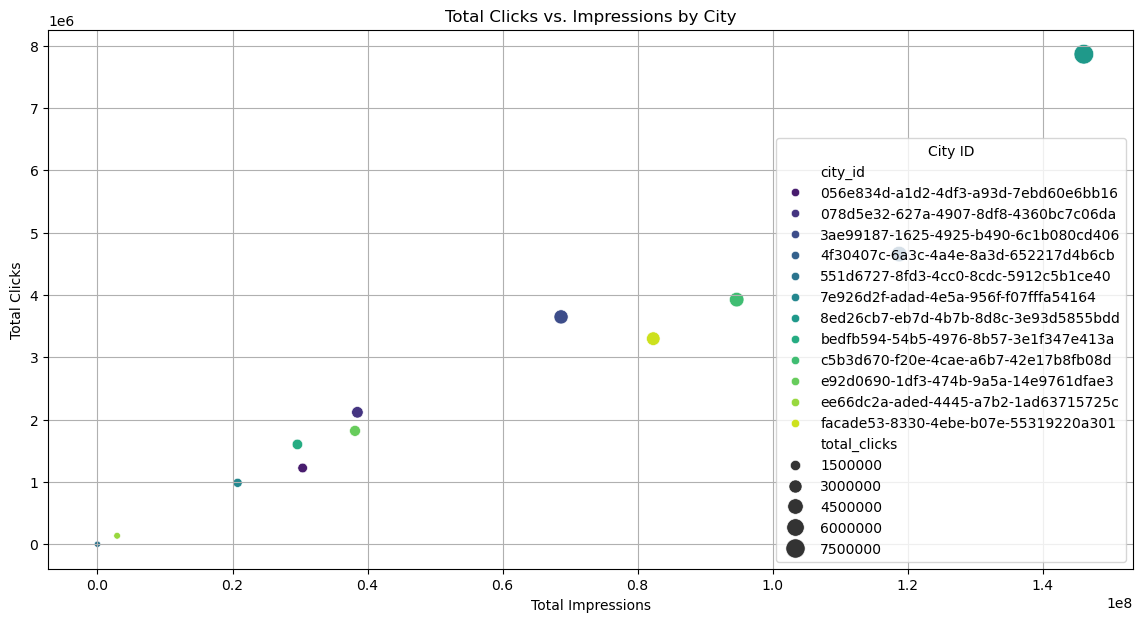

In [24]:
# Aggregate data by city
city_impressions_data = df.groupby('city_id').agg({
    'total_clicks': 'sum',
    'session_views': 'sum'
}).reset_index()

# Scatter plot for clicks vs. impressions
plt.figure(figsize=(14, 7))
sns.scatterplot(x='session_views', y='total_clicks', data=city_impressions_data, hue='city_id', palette='viridis', size='total_clicks', sizes=(20, 200))
plt.title('Total Clicks vs. Impressions by City')
plt.xlabel('Total Impressions')
plt.ylabel('Total Clicks')
plt.legend(title='City ID')
plt.grid(True)
plt.show()


In [25]:
!pip install xgboost


In [26]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [96]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from category_encoders import BinaryEncoder
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, log_loss
import xgboost as xgb


** Feature Engineering **

In [136]:
# binary encoding
binary_encoder = BinaryEncoder(cols=['city_id'])
X_city_id = binary_encoder.fit_transform(df[['city_id']])

In [138]:
# tf idf vectorization
tfidf_vectorizer = TfidfVectorizer()
X_search_term = tfidf_vectorizer.fit_transform(df['search_term'])

In [139]:
# combining features
X = hstack([X_search_term, csr_matrix(X_city_id)])

In [140]:
# convert original data to sparse format for compatibility
session_views = csr_matrix(df[['session_views']])
total_clicks = csr_matrix(df[['total_clicks']])

In [141]:
# conacatenate with original data
X_combined = hstack([X, session_views, total_clicks])

In [142]:
# group by search term and city ID
group_keys = df['search_term'].astype(str) + "_" + df['city_id'].astype(str)
grouped_data = pd.DataFrame({
    'group_key': group_keys,
    'session_views': np.asarray(X_combined[:, -2].todense()).flatten(),  # Extract session_views
    'total_clicks': np.asarray(X_combined[:, -1].todense()).flatten()   # Extract total_clicks
})

In [143]:

grouped_data = grouped_data.groupby('group_key').agg({
    'session_views': 'sum',
    'total_clicks': 'sum'
}).reset_index()

In [134]:
#click view ratio
grouped_data['click_view_ratio'] = grouped_data['total_clicks'] / (grouped_data['session_views'] + 1) 

In [36]:
# Define features and target
X_agg = grouped_data[['session_views', 'total_clicks']]
y = grouped_data['click_view_ratio']

In [132]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X_agg, y, test_size=0.2, random_state=42)

In [38]:
# Model 1: XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [130]:
# Evaluation
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost Model Mean Squared Error: {mse_xgb}')
print(f'XGBoost Model R^2 Score: {r2_xgb}')
# for Log Loss and AUROC
y_pred_xgb_prob = np.clip(y_pred_xgb, 0, 1) 
y_test_binary = (y_test > 0).astype(int)  
try:
    log_loss_xgb = log_loss(y_test_binary, y_pred_xgb_prob)
except ValueError as e:
    log_loss_xgb = np.nan  

try:
    auc_xgb = roc_auc_score(y_test_binary, y_pred_xgb_prob)
except ValueError as e:
    auc_xgb = np.nan 

print(f'XGBoost Model Log Loss: {log_loss_xgb}')
print(f'XGBoost Model AUROC Score: {auc_xgb}')

XGBoost Model Mean Squared Error: 6.670947679182572e-05
XGBoost Model R^2 Score: 0.9904753111176674
XGBoost Model Log Loss: 3.4562185530104808
XGBoost Model AUROC Score: 0.9967846270928463


In [128]:
# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluation
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# for Log Loss and AUROC
y_pred_rf_prob = np.clip(y_pred_rf, 0, 1) 
try:
    log_loss_rf = log_loss(y_test_binary, y_pred_rf_prob)
except ValueError as e:
    log_loss_rf = np.nan 

try:
    auc_rf = roc_auc_score(y_test_binary, y_pred_rf_prob)
except ValueError as e:
    auc_rf = np.nan  

print(f'Random Forest Model Mean Squared Error: {mse_rf}')
print(f'Random Forest Model R^2 Score: {r2_rf}')
print(f'Random Forest Model Log Loss: {log_loss_rf}')
print(f'Random Forest Model AUROC Score: {auc_rf}')


Random Forest Model Mean Squared Error: 8.022016943677218e-05
Random Forest Model R^2 Score: 0.9885462726928943
Random Forest Model Log Loss: 3.4277841281637773
Random Forest Model AUROC Score: 1.0


In [126]:

X_agg_sparse = csr_matrix(X_agg)
y_pred_xgb_full = xgb_model.predict(X_agg)
grouped_data['predicted_click_view_ratio_xgb'] = y_pred_xgb_full

y_pred_rf_full = rf_model.predict(X_agg)
grouped_data['predicted_click_view_ratio_rf'] = y_pred_rf_full

# Ranking and Metrics Calculation (MRR Calculation, HR@10 Calculation, NDCG Calculation )

In [124]:

def calculate_metrics(df, predictions, true_values):
  
    def mean_reciprocal_rank(true_relevances, predicted_scores):
        ranks = [1 / (rank + 1) for rank, score in enumerate(predicted_scores) if true_relevances[rank] == 1]
        return np.mean(ranks) if ranks else 0
    
   
    def hit_rate_at_k(true_relevances, predicted_scores, k=10):
        top_k_predictions = np.argsort(predicted_scores)[-k:]
        return np.any(true_relevances[top_k_predictions] == 1)
    
    
    def ndcg_at_k(true_relevances, predicted_scores, k=10):
        sorted_indices = np.argsort(predicted_scores)[::-1][:k]
        true_relevances_sorted = np.array(true_relevances)[sorted_indices]
        dcg = np.sum((2**true_relevances_sorted - 1) / np.log2(np.arange(2, len(true_relevances_sorted) + 2)))
        idcg = np.sum((2**np.sort(true_relevances_sorted)[::-1] - 1) / np.log2(np.arange(2, len(true_relevances_sorted) + 2)))
        return dcg / idcg if idcg > 0 else 0
    
   
    true_relevances = (true_values > 0).astype(int)
    
    mrr = mean_reciprocal_rank(true_relevances, predictions)
    hr_at_10 = hit_rate_at_k(true_relevances, predictions)
    ndcg_at_10 = ndcg_at_k(true_relevances, predictions)
    
    return mrr, hr_at_10, ndcg_at_10

# XGBoost
mrr_xgb, hr_at_10_xgb, ndcg_at_10_xgb = calculate_metrics( grouped_data,  grouped_data['predicted_click_view_ratio_xgb'],  grouped_data['click_view_ratio'])
print(f'XGBoost Model MRR: {mrr_xgb}')
print(f'XGBoost Model HR@10: {hr_at_10_xgb}')
print(f'XGBoost Model NDCG@10: {ndcg_at_10_xgb}')

# Random Forest 
mrr_rf, hr_at_10_rf, ndcg_at_10_rf = calculate_metrics(grouped_data, grouped_data['predicted_click_view_ratio_rf'], grouped_data['click_view_ratio'])
print(f'Random Forest Model MRR: {mrr_rf}')
print(f'Random Forest Model HR@10: {hr_at_10_rf}')
print(f'Random Forest Model NDCG@10: {ndcg_at_10_rf}')


XGBoost Model MRR: 0.0003794968623427365
XGBoost Model HR@10: True
XGBoost Model NDCG@10: 1.0
Random Forest Model MRR: 0.0003794968623427365
Random Forest Model HR@10: True
Random Forest Model NDCG@10: 1.0


** Ranking products based on predicted click-view ratio**

In [122]:
#XBG
ranked_products_xgb = grouped_data.sort_values(by='predicted_click_view_ratio_xgb', ascending=False)
print('\nTop 10 Ranks for XGBoost Model:')
print(ranked_products_xgb.head(10))


Top 10 Ranks for XGBoost Model:
                                               group_key  session_views  \
8406       goodlife_8ed26cb7-eb7d-4b7b-8d8c-3e93d5855bdd        14897.0   
18024         sting_e92d0690-1df3-474b-9a5a-14e9761dfae3        16688.0   
18020         sting_7e926d2f-adad-4e5a-956f-f07fffa54164         5502.0   
19032  tomato puree_ee66dc2a-aded-4445-a7b2-1ad63715725c         1022.0   
18266       sunrise_ee66dc2a-aded-4445-a7b2-1ad63715725c           16.0   
18025         sting_ee66dc2a-aded-4445-a7b2-1ad63715725c         3312.0   
7837   garlic butter_3ae99187-1625-4925-b490-6c1b080c...         5691.0   
18003       stellar_ee66dc2a-aded-4445-a7b2-1ad63715725c           96.0   
18023         sting_c5b3d670-f20e-4cae-a6b7-42e17b8fb08d        31271.0   
7199     fine touch_8ed26cb7-eb7d-4b7b-8d8c-3e93d5855bdd         4965.0   

       total_clicks  click_view_ratio  predicted_click_view_ratio_xgb  \
8406        17956.0          1.205262                        1.20012

In [118]:
#RF
ranked_products_rf = grouped_data.sort_values(by='predicted_click_view_ratio_rf', ascending=False)
print('\nTop 10 Ranks for Random Forest Model:')
print(ranked_products_rf.head(10))


Top 10 Ranks for Random Forest Model:
                                               group_key  session_views  \
18024         sting_e92d0690-1df3-474b-9a5a-14e9761dfae3        16688.0   
8406       goodlife_8ed26cb7-eb7d-4b7b-8d8c-3e93d5855bdd        14897.0   
18020         sting_7e926d2f-adad-4e5a-956f-f07fffa54164         5502.0   
19032  tomato puree_ee66dc2a-aded-4445-a7b2-1ad63715725c         1022.0   
18266       sunrise_ee66dc2a-aded-4445-a7b2-1ad63715725c           16.0   
7837   garlic butter_3ae99187-1625-4925-b490-6c1b080c...         5691.0   
18025         sting_ee66dc2a-aded-4445-a7b2-1ad63715725c         3312.0   
7199     fine touch_8ed26cb7-eb7d-4b7b-8d8c-3e93d5855bdd         4965.0   
1073    baby potato_e92d0690-1df3-474b-9a5a-14e9761dfae3         1540.0   
18003       stellar_ee66dc2a-aded-4445-a7b2-1ad63715725c           96.0   

       total_clicks  click_view_ratio  predicted_click_view_ratio_xgb  \
18024       19726.0          1.181976                        1